In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("data/supermarket_1.csv")

ShapiroResult(statistic=0.9325848817825317, pvalue=7.980551308206381e-21)


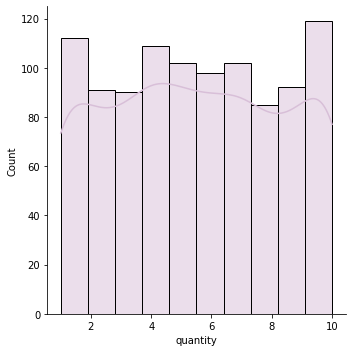

In [8]:
# EVALUACIÓN DE ASUNCIONES: Cada asunción la deberéis testar de forma visual y analítica.

# NORMALIDAD:

print (stats.shapiro(df["quantity"]))
sns.displot(df["quantity"], kde = True, color = "thistle", bins=10);

In [ ]:
# HOMOCEDASTICIDAD: 